## EDA 

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dados = pd.read_csv("C:/Users/mcaio/Desktop/regressao linear/Car details v3.csv")

In [3]:
dados.shape

(8128, 13)

In [4]:
dados.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
dados.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
dados.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

### Analise dos dados

<AxesSubplot:xlabel='owner', ylabel='count'>

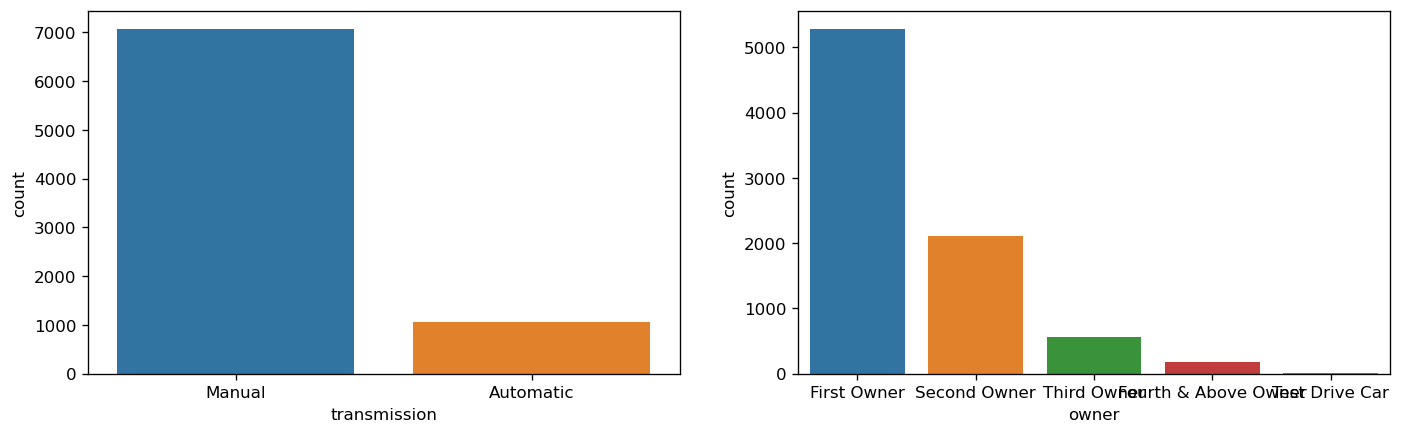

In [9]:
plt.figure(figsize=(14,4), dpi = 120)
plt.subplot(1,2,1)
sns.countplot(x='transmission',data=dados)
plt.subplot(1,2,2)
sns.countplot(x='owner',data=dados)

<AxesSubplot:xlabel='fuel', ylabel='count'>

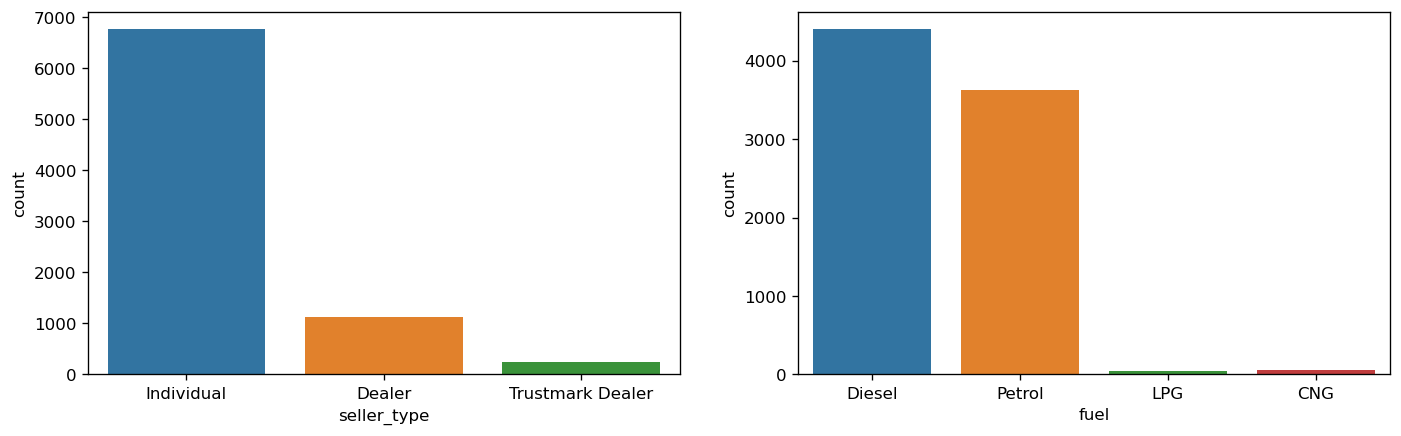

In [10]:
plt.figure(figsize = (14,4), dpi = 120)
plt.subplot(1,2,1)
sns.countplot(data = dados, x = 'seller_type')
plt.subplot(1,2,2)
sns.countplot(data = dados, x = "fuel")

In [11]:
dados['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

<AxesSubplot:>

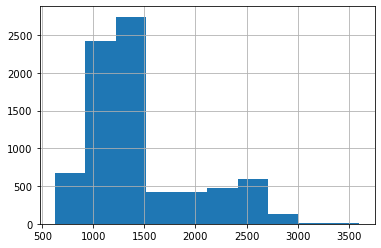

In [13]:
dados['engine'].hist()

<AxesSubplot:>

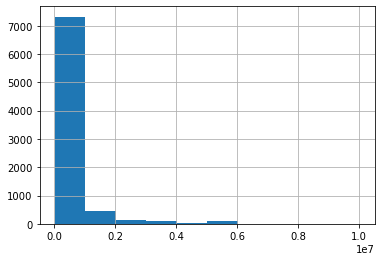

In [14]:
dados['selling_price'].hist()

<AxesSubplot:xlabel='engine'>

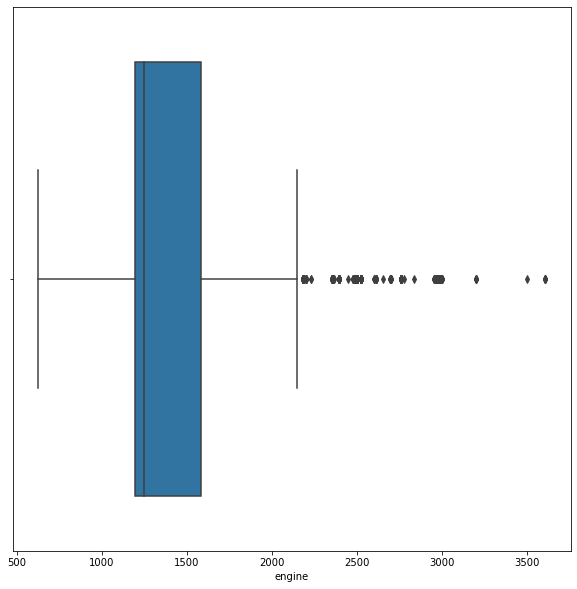

In [15]:
f, ax = plt.subplots(figsize = (10,10))
sns.boxplot(data = dados, x = 'engine')

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

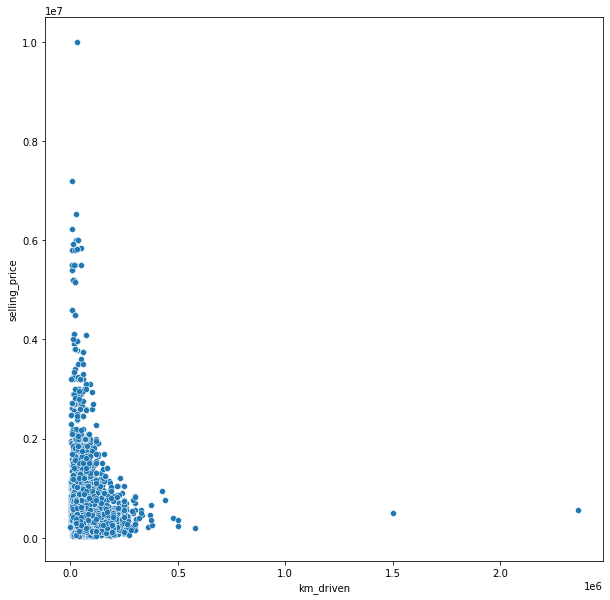

In [16]:
f, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(data = dados,x = 'km_driven', y = 'selling_price')

C:\Users\mcaio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

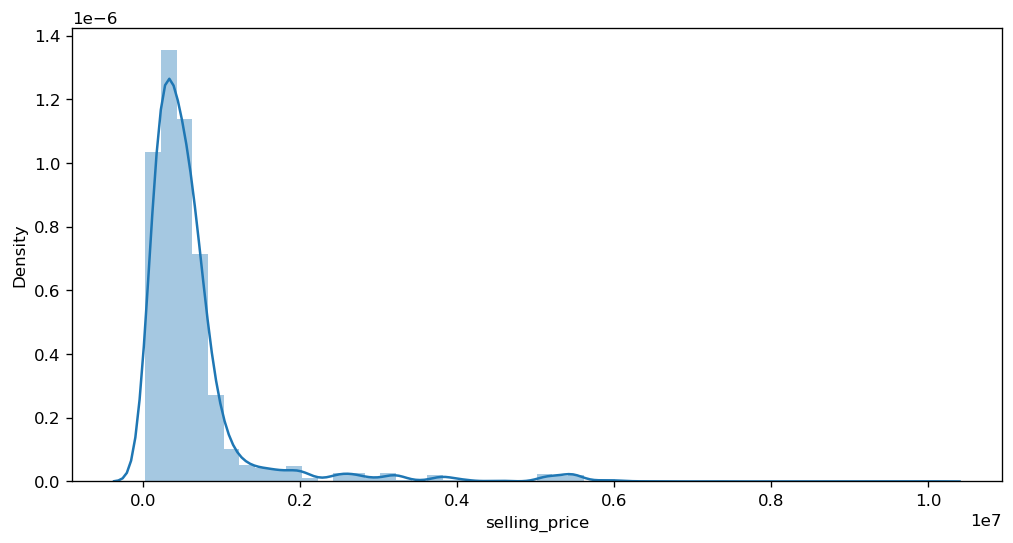

In [17]:
plt.figure(figsize = (10,5), dpi = 120)
sns.distplot(dados['selling_price'])

C:\Users\mcaio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='km_driven', ylabel='Density'>

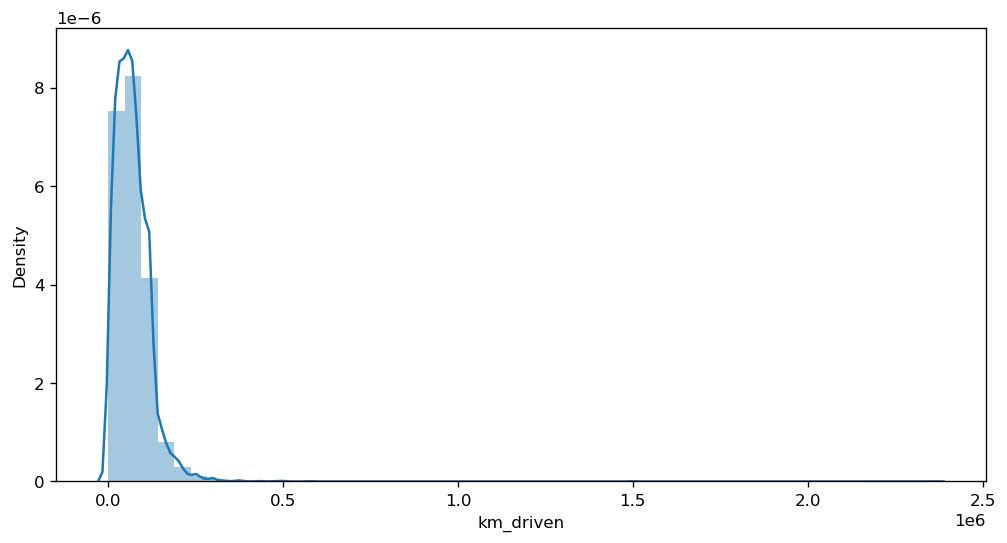

In [18]:
plt.figure(figsize = (10,5), dpi = 120)
sns.distplot(dados['km_driven'])

<AxesSubplot:xlabel='age', ylabel='selling_price'>

<Figure size 720x480 with 0 Axes>

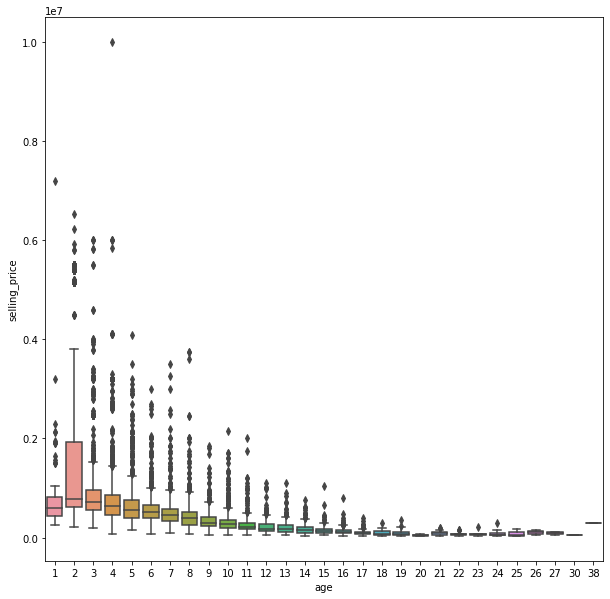

In [19]:
plt.figure(dpi = 120)
f, ax = plt.subplots(figsize = (10,10))
sns.boxplot(data = dados,x = 'age', y = 'selling_price')

<AxesSubplot:xlabel='age', ylabel='count'>

<Figure size 720x480 with 0 Axes>

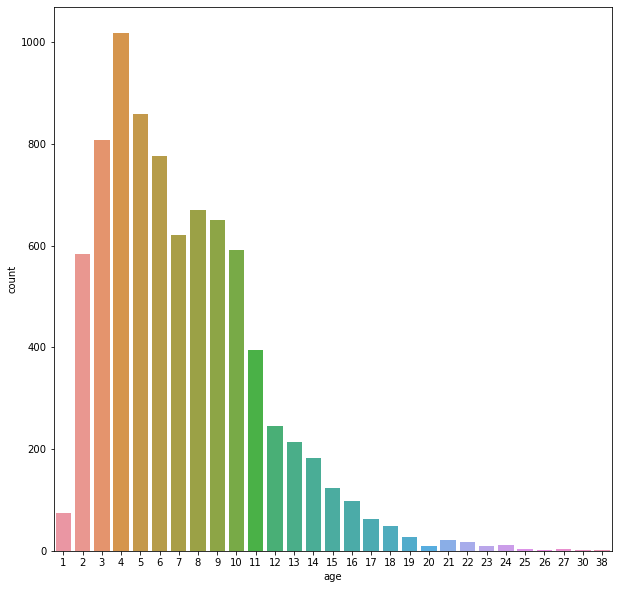

In [20]:
plt.figure(dpi = 120)
plt.subplots(figsize = (10,10))

sns.countplot(data = dados, x = 'age')

<AxesSubplot:>

<Figure size 720x480 with 0 Axes>

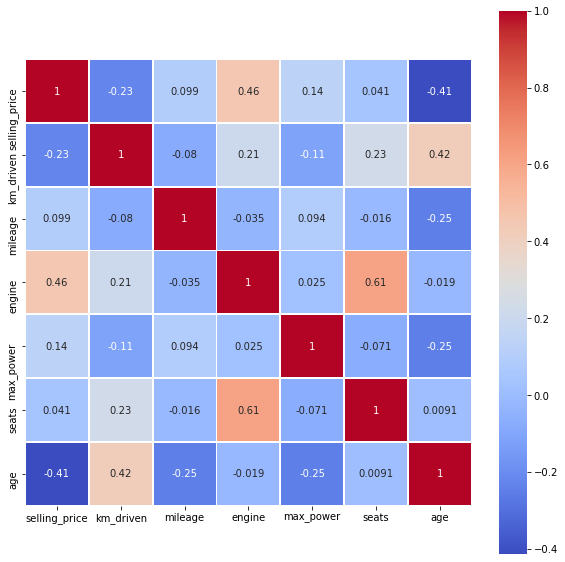

In [21]:
plt.figure(dpi = 120)

f, ax = plt.subplots(figsize = (10,10))

sns.heatmap(data = dados.corr(), annot = True, linewidths = 0.8, cmap = 'coolwarm', square = True)

In [22]:
dados['transmission'].value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

<Figure size 720x480 with 0 Axes>

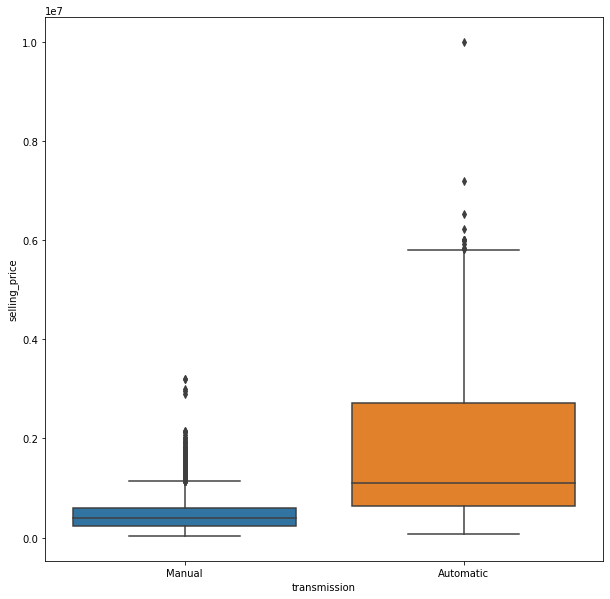

In [23]:
plt.figure(dpi = 120)

plt.subplots(figsize = (10,10))

sns.boxplot(data = dados, x = "transmission", y = "selling_price")

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

<Figure size 720x480 with 0 Axes>

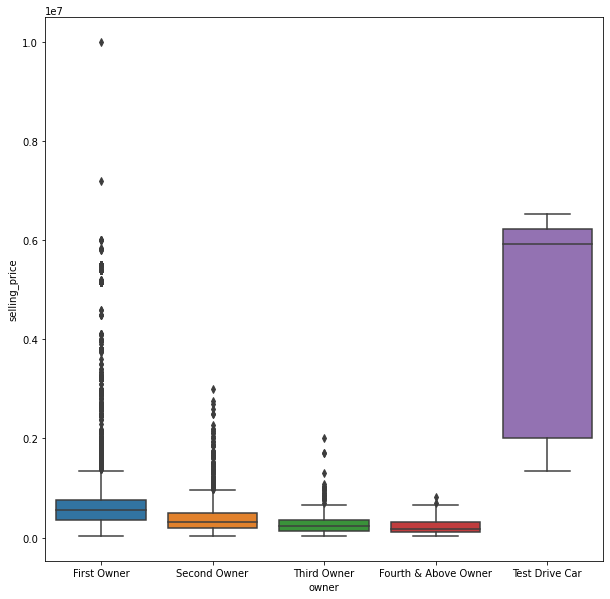

In [24]:
plt.figure(dpi = 120)
plt.subplots(figsize = (10,10))

sns.boxplot(data = dados, x = 'owner', y = 'selling_price')

<Figure size 720x480 with 0 Axes>

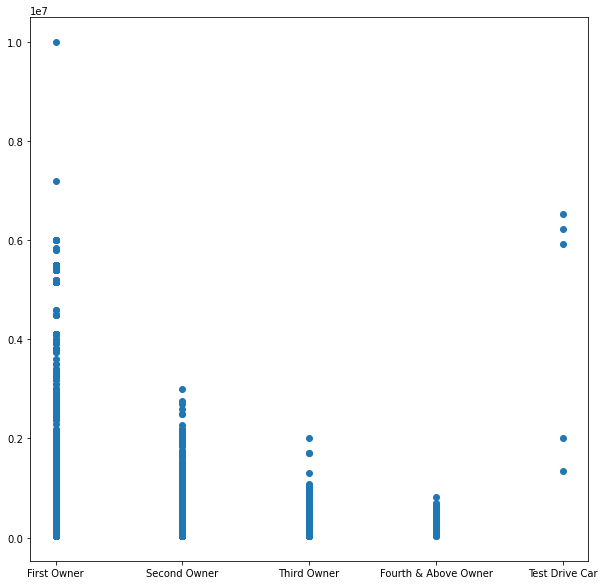

In [25]:
plt.figure(dpi = 120)
plt.subplots(figsize = (10,10))

plt.scatter(data = dados, x = 'owner', y = 'selling_price')